# Predict math student performance based on Decicion Tree
https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [1]:
# Load dataset 
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')
len(df)

395

In [3]:
# generate binary label (pass/fail) based on G1 + G2 + G3 (test grades, each 0-20 pts); Passing >= 35
df['pass'] = df.apply(lambda row: 1 if (row['G1'] + row['G2'] + row['G3']) >= 35 else 0, axis=1)
df = df.drop(['G1', 'G2', 'G3'], axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,0


In [4]:
# Use one-hot encoding on categorial columns
df = pd.get_dummies(df, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 
                                 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
                                 'activities', 'nursery', 'higher', 'internet', 'romantic'])
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [5]:
# shuffle rows
df = df.sample(frac=1)

# split tranining and testing data
d_train = df[:316]
d_test = df[316:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = df.drop(['pass'], axis=1)
d_pass = df['pass']

# number of passing students in whole dataset:
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 166 out of 395 (42.03%)


In [6]:
# Fit a decision tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
t = t.fit(d_train_att, d_train_pass)

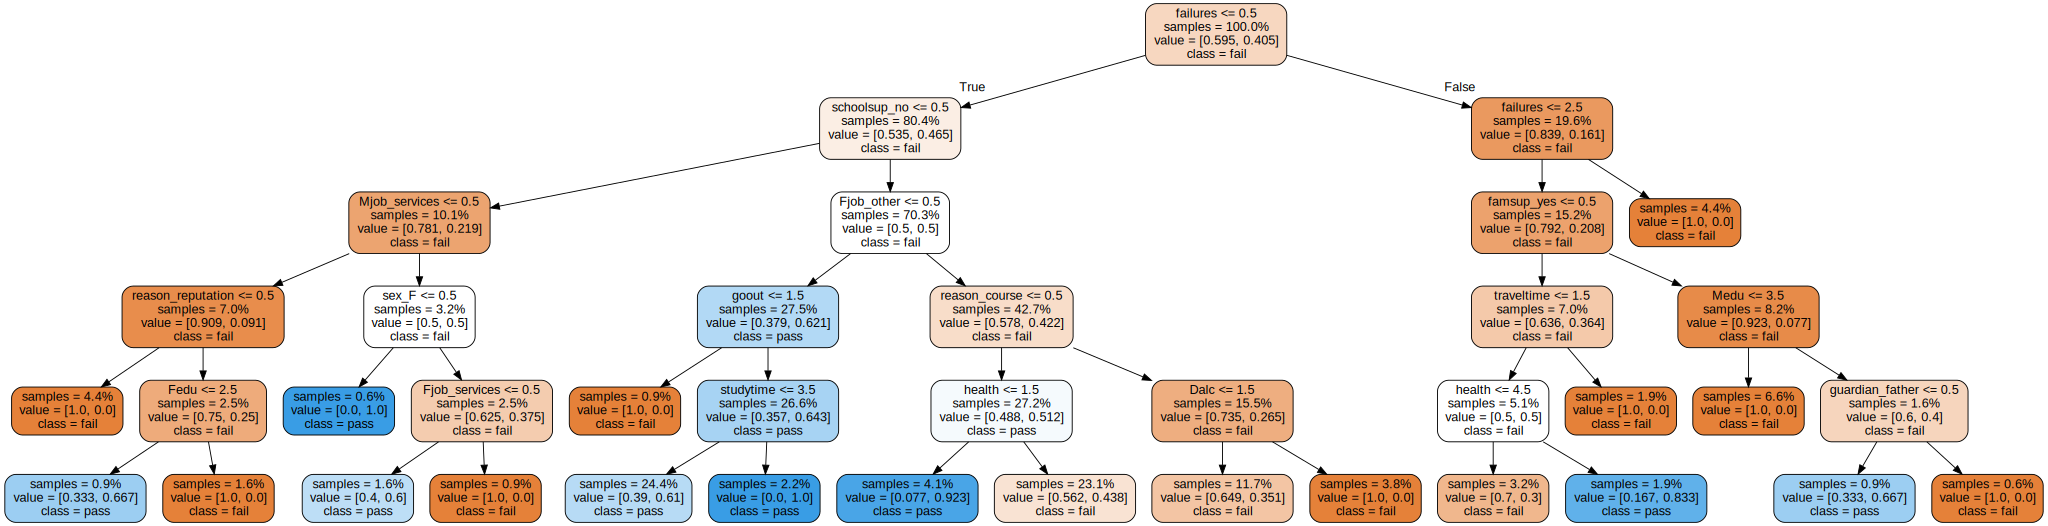

In [7]:
# Visualize tree
dot_data = tree.export_graphviz(t, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(d_train_att), class_names=['fail', 'pass'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [8]:
# save tree
tree.export_graphviz(t, out_file='student-performance-math.dot', label='all', impurity=False, proportion=True,
                    feature_names=list(d_train_att), class_names=['fail', 'pass'],
                    filled=True, rounded=True)

In [9]:
t.score(d_test_att, d_test_pass)

0.5063291139240507

In [10]:
scores = cross_val_score(t, d_att, d_pass, cv=5)
# Show avarage score and +/- two standard deviations away (covering 95% or scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.55 (+/- 0.08)


In [11]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.58 (+/- 0.01)
Max depth: 2, Accuracy: 0.60 (+/- 0.08)
Max depth: 3, Accuracy: 0.57 (+/- 0.06)
Max depth: 4, Accuracy: 0.58 (+/- 0.02)
Max depth: 5, Accuracy: 0.56 (+/- 0.05)
Max depth: 6, Accuracy: 0.58 (+/- 0.07)
Max depth: 7, Accuracy: 0.59 (+/- 0.06)
Max depth: 8, Accuracy: 0.60 (+/- 0.08)
Max depth: 9, Accuracy: 0.57 (+/- 0.02)
Max depth: 10, Accuracy: 0.57 (+/- 0.05)
Max depth: 11, Accuracy: 0.57 (+/- 0.10)
Max depth: 12, Accuracy: 0.54 (+/- 0.08)
Max depth: 13, Accuracy: 0.57 (+/- 0.08)
Max depth: 14, Accuracy: 0.56 (+/- 0.05)
Max depth: 15, Accuracy: 0.56 (+/- 0.04)
Max depth: 16, Accuracy: 0.57 (+/- 0.05)
Max depth: 17, Accuracy: 0.59 (+/- 0.04)
Max depth: 18, Accuracy: 0.56 (+/- 0.07)
Max depth: 19, Accuracy: 0.58 (+/- 0.06)


In [13]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
depth_acc

array([[1.00000000e+00, 5.79751704e-01, 6.30768599e-03],
       [2.00000000e+00, 5.95201233e-01, 8.47961375e-02],
       [3.00000000e+00, 5.67030996e-01, 6.58161971e-02],
       [4.00000000e+00, 5.79720058e-01, 2.00780314e-02],
       [5.00000000e+00, 5.46645570e-01, 6.40055878e-02],
       [6.00000000e+00, 5.89911555e-01, 6.59397652e-02],
       [7.00000000e+00, 5.77412366e-01, 5.50191733e-02],
       [8.00000000e+00, 5.89910743e-01, 7.14809458e-02],
       [9.00000000e+00, 5.74686790e-01, 6.27319681e-02],
       [1.00000000e+01, 5.72093476e-01, 8.15661193e-02],
       [1.10000000e+01, 5.64338689e-01, 1.01256157e-01],
       [1.20000000e+01, 5.79816618e-01, 3.34133300e-02],
       [1.30000000e+01, 5.84975657e-01, 8.32874670e-02],
       [1.40000000e+01, 5.59625122e-01, 5.38723267e-02],
       [1.50000000e+01, 5.69530185e-01, 5.03889609e-02],
       [1.60000000e+01, 5.72250081e-01, 8.56621673e-02],
       [1.70000000e+01, 5.84814184e-01, 8.79196193e-02],
       [1.80000000e+01, 5.67251

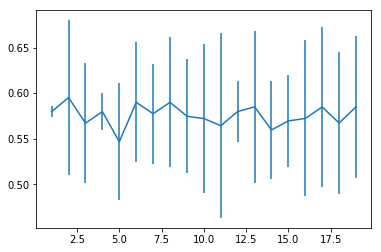

In [14]:
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()